In [1]:
import tifffile as tiff
from spectral import imshow, save_rgb
import numpy as np
from osgeo import ogr
from osgeo import gdal
import matplotlib

In [2]:
b3 = tiff.imread('C:/Users/Pichau/Downloads/B3.tif')
b4 = tiff.imread('C:/Users/Pichau/Downloads/B4.tif')
ndvi = ((b4-b3)/(b4+b3))

In [3]:
nd = ndvi > 0.35

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

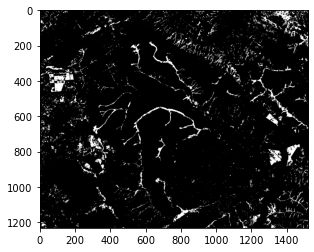

In [4]:
imshow(nd)

In [5]:
save_rgb('nd.tif',nd)
img = gdal.Open('nd.tif')
nd = img.GetRasterBand(1)

In [6]:
shp_driver = ogr.GetDriverByName("ESRI Shapefile")

shape_saida = shp_driver.CreateDataSource( 'ndvi.shp')
novo_shape = shape_saida.CreateLayer('ndvi.shp', srs = None )

In [7]:
gdal.Polygonize(nd, None, novo_shape, 255, [], callback=None)
shape_saida.Destroy()

In [8]:
import geopandas as gpd

shp = gpd.read_file('ndvi.shp')

In [9]:
shp.head()

,FID,geometry
0,0,"POLYGON ((79.000 0.000, 79.000 2.000, 82.000 2..."
1,1,"POLYGON ((85.000 0.000, 85.000 1.000, 87.000 1..."
2,2,"POLYGON ((154.000 0.000, 154.000 1.000, 159.00..."
3,3,"POLYGON ((334.000 0.000, 334.000 1.000, 335.00..."
4,4,"POLYGON ((346.000 0.000, 346.000 3.000, 347.00..."


<AxesSubplot:>

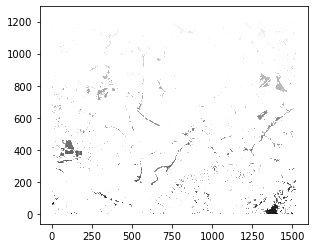

In [10]:
shp.plot(column='FID', cmap='binary_r')